<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-1/blob/main/ML1_ClassificationProject_CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# 1. Data Exploration and Preprocessing
## 1.1Loading the Dataset

In [108]:
creditCard = pd.read_csv('/content/creditcard.csv')
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1.2 Understanding the dataset & Handling missing values

In [109]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

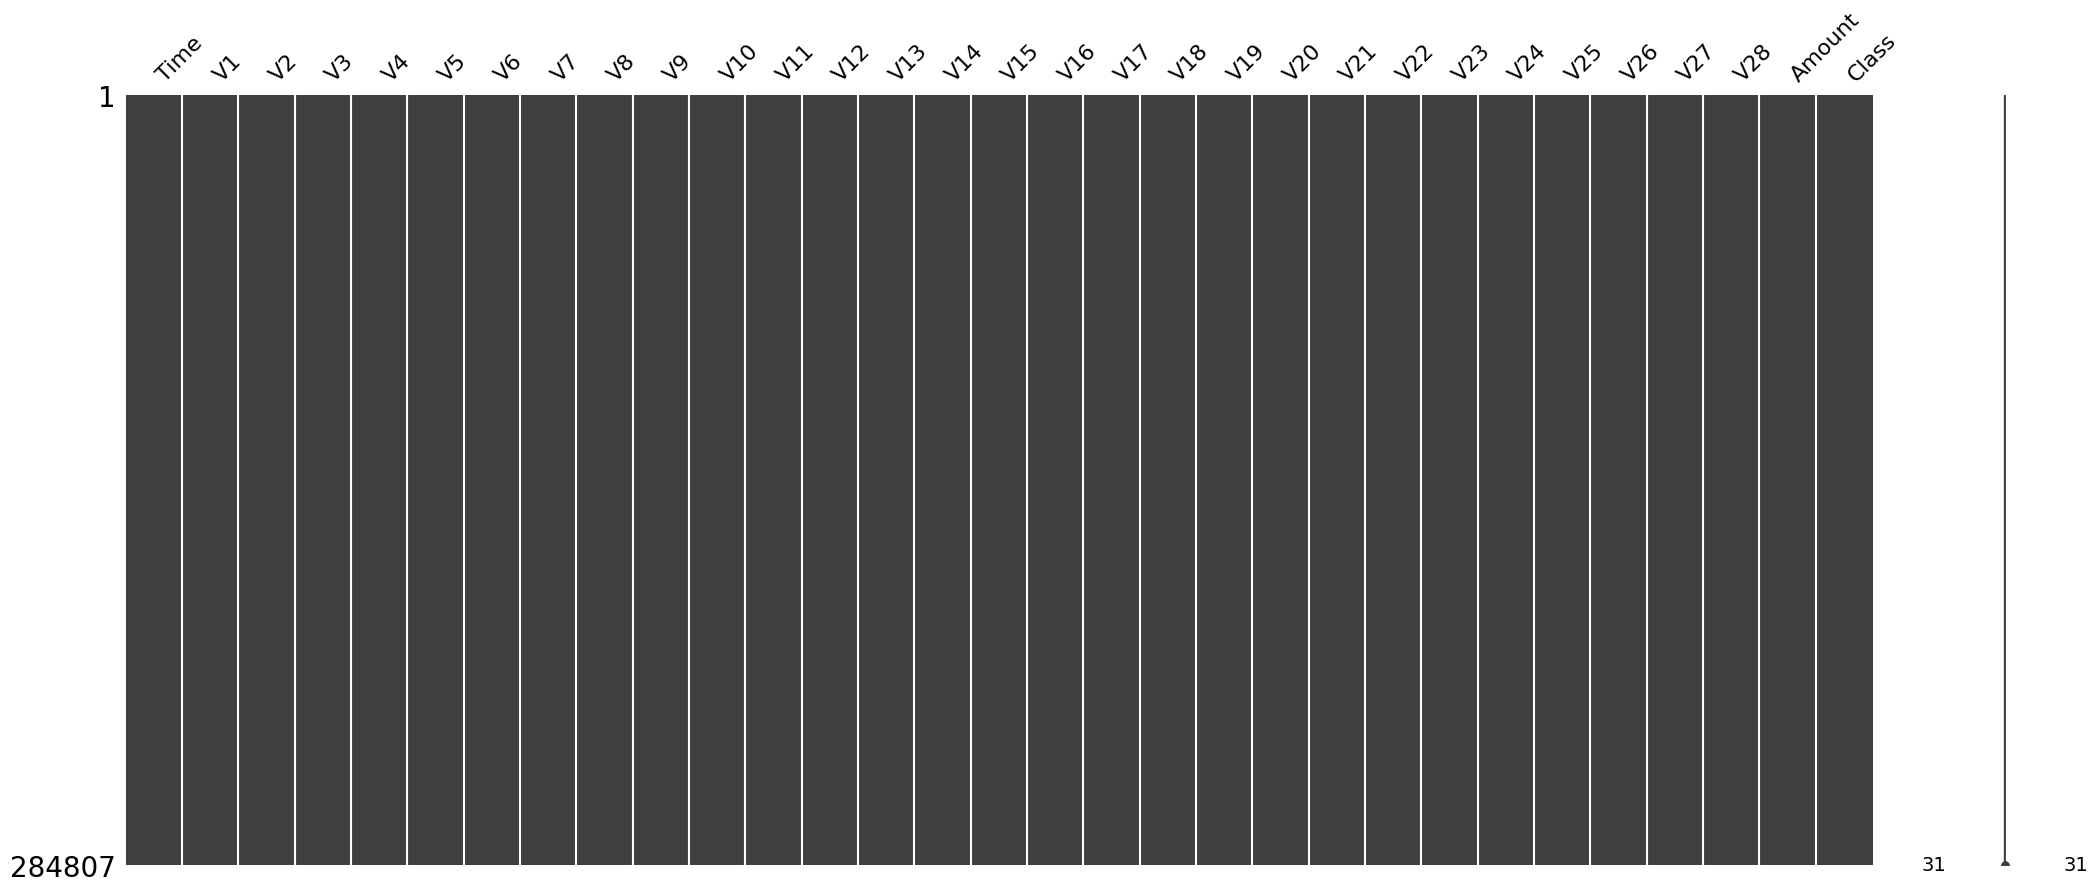

In [110]:
# missingno matrix
msno.matrix(creditCard)

<Axes: >

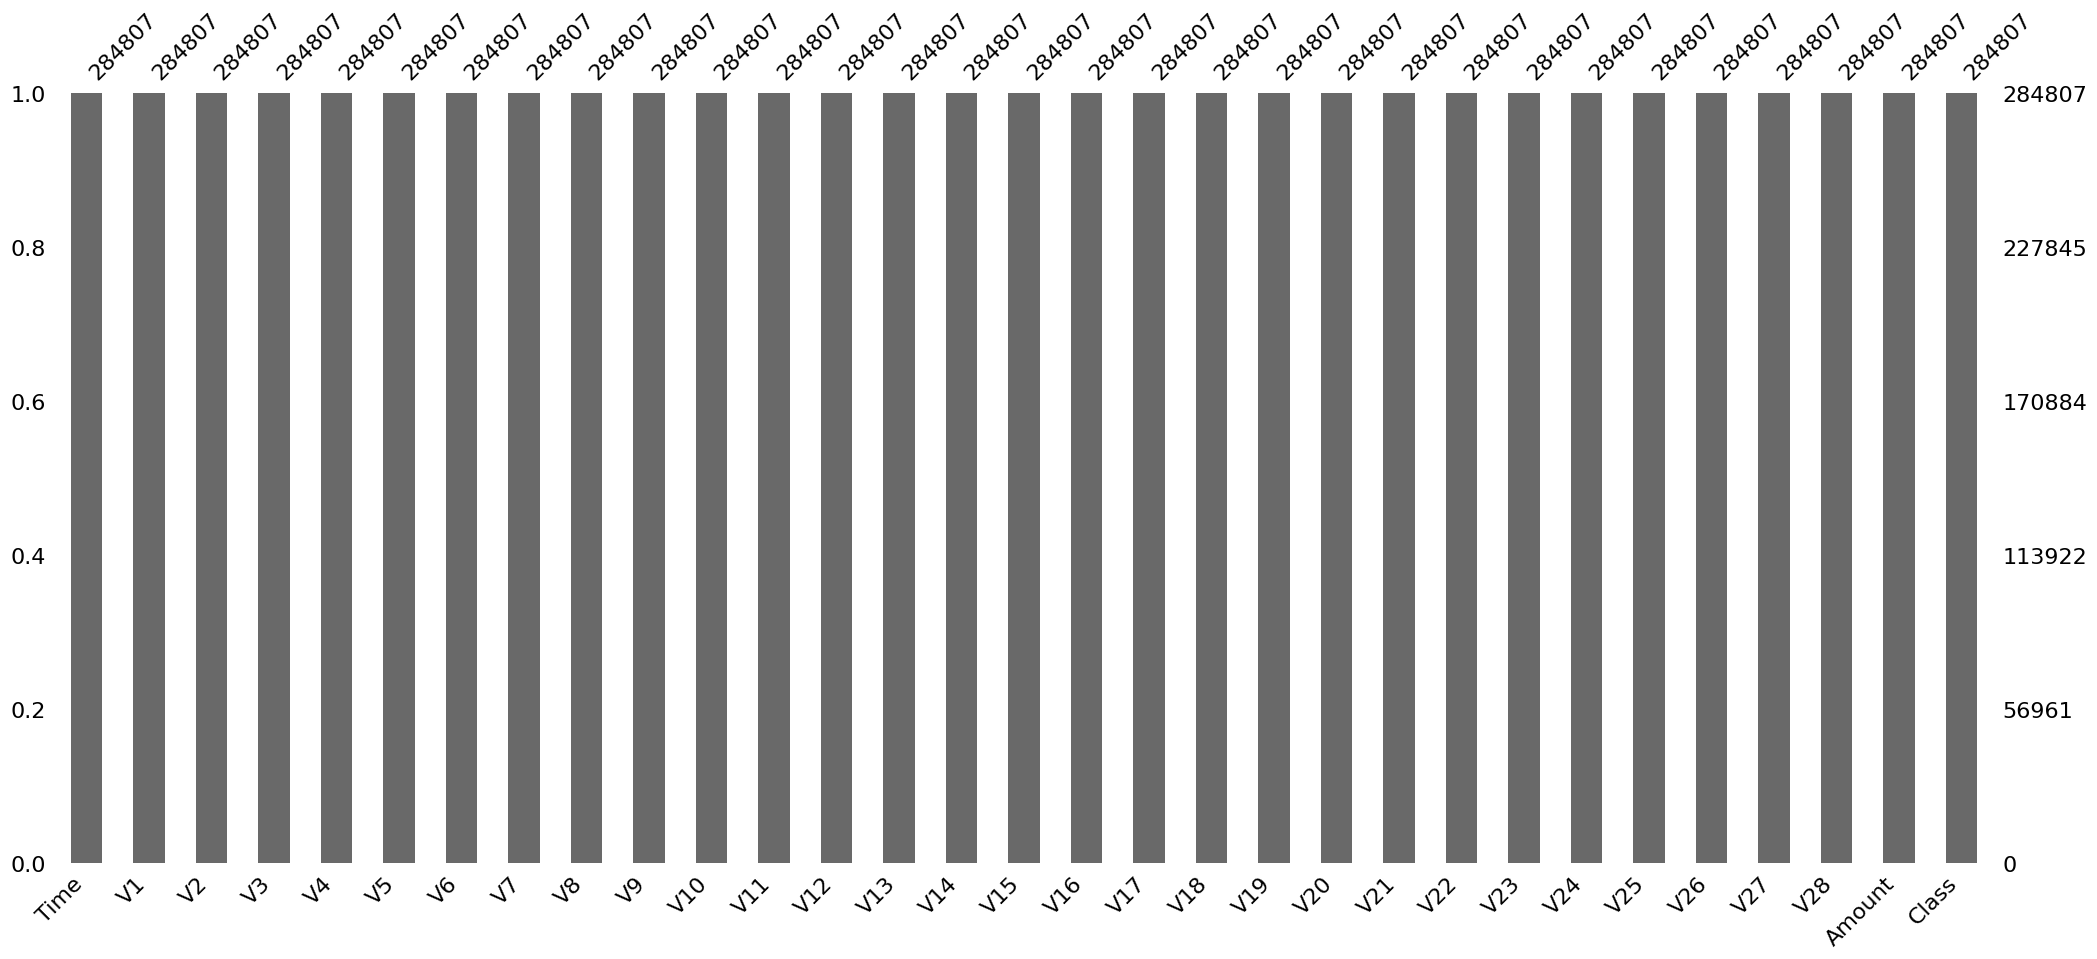

In [111]:
# missingno barplot
msno.bar(creditCard)

In [112]:
creditCard.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


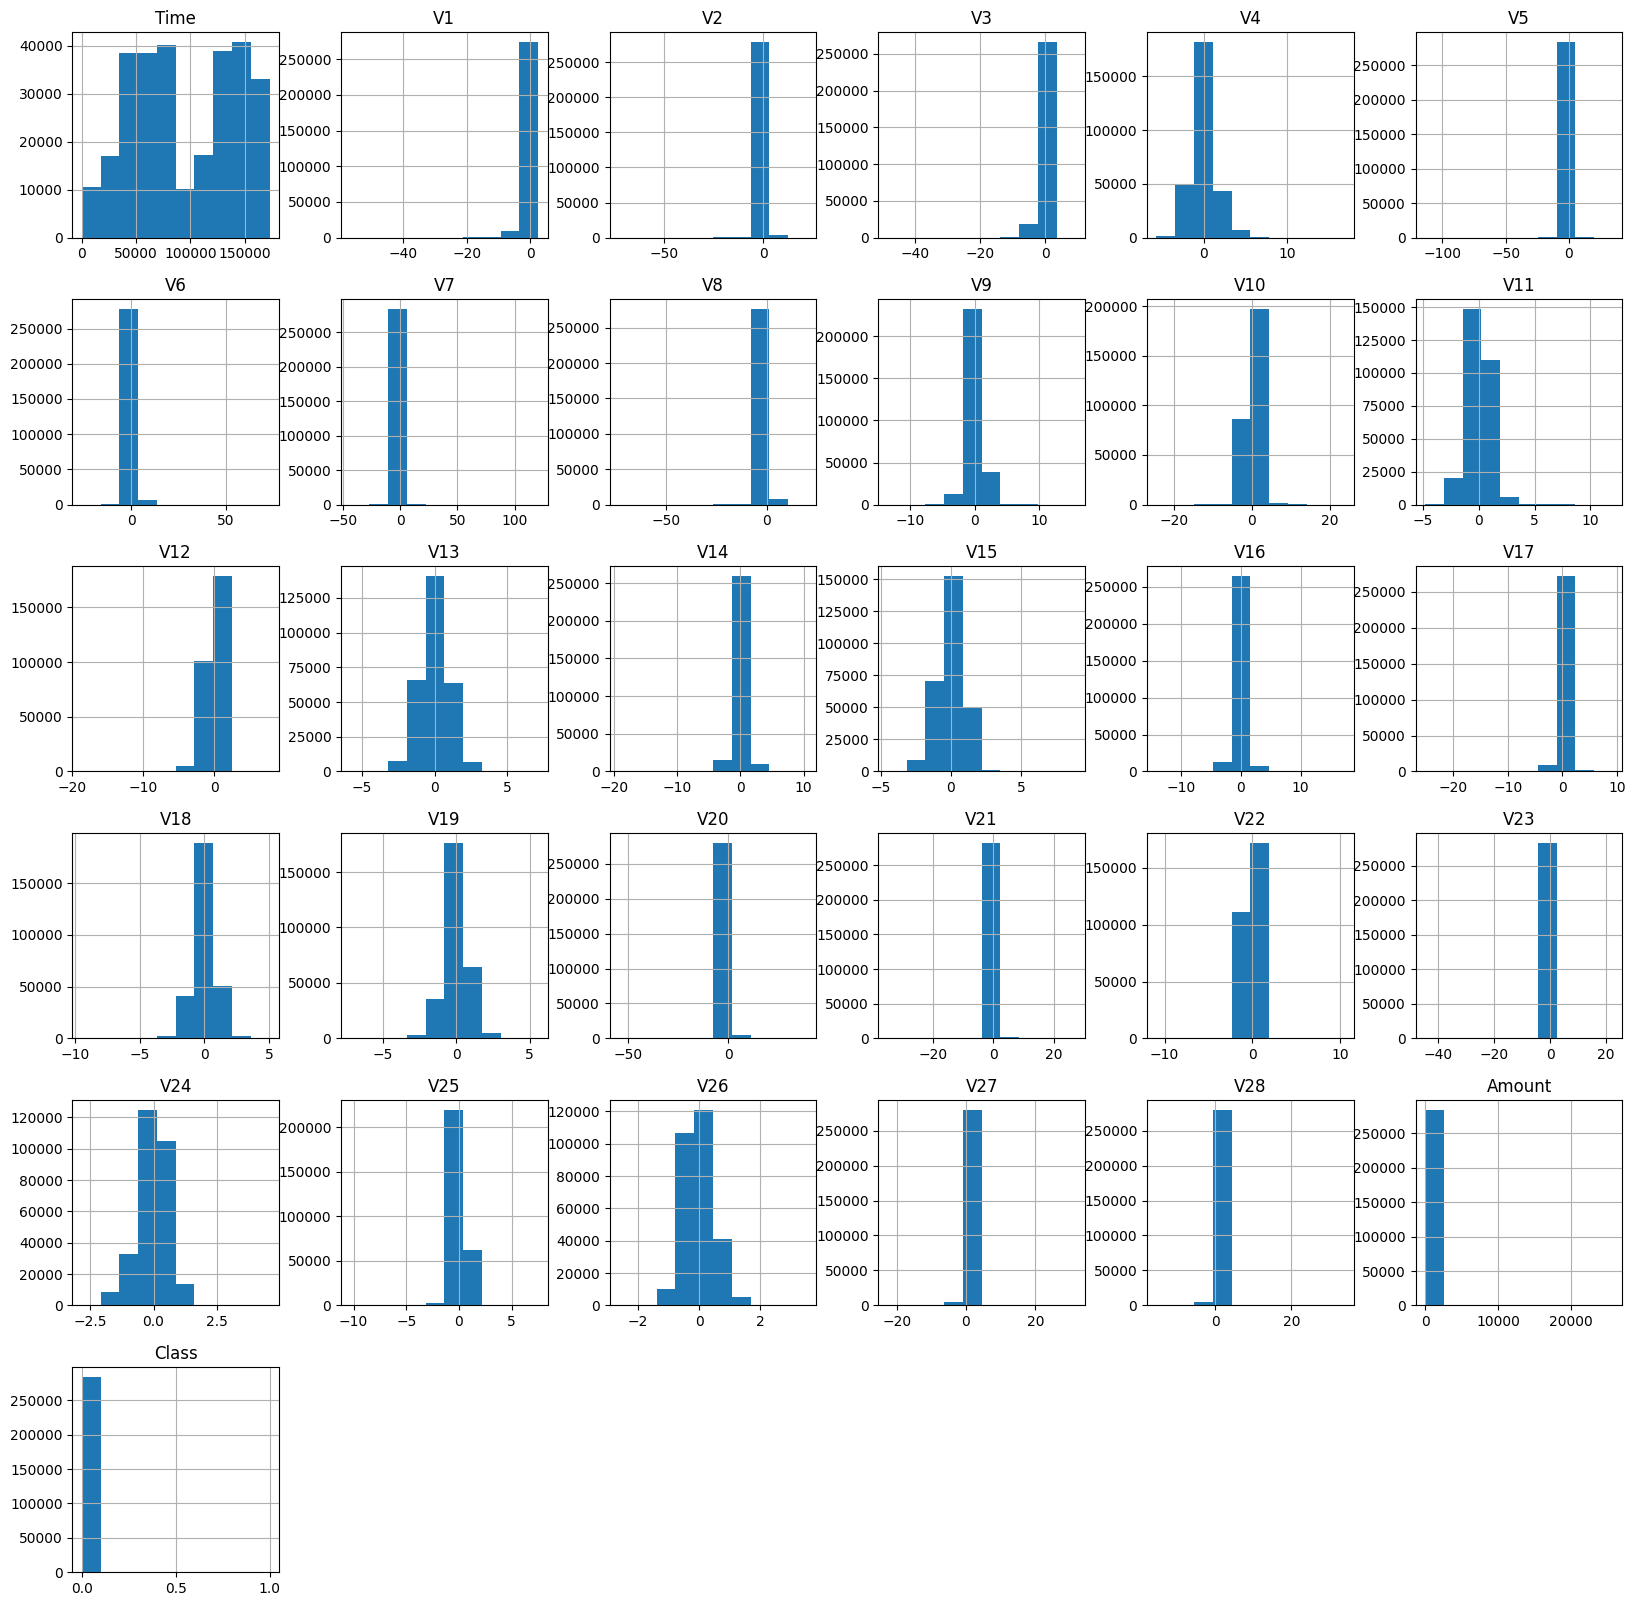

In [113]:
# ploting histograms for each column to visualize distributions
creditCard.hist(figsize=(20,20))
plt.show()

In [114]:
# filling missing values with median for each column
creditCard.fillna(creditCard.median(), inplace=True)


In [115]:
creditCard.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [116]:
creditCard['Class'].value_counts()

,count
Class,
0,284315
1,492


<Axes: xlabel='count', ylabel='Class'>

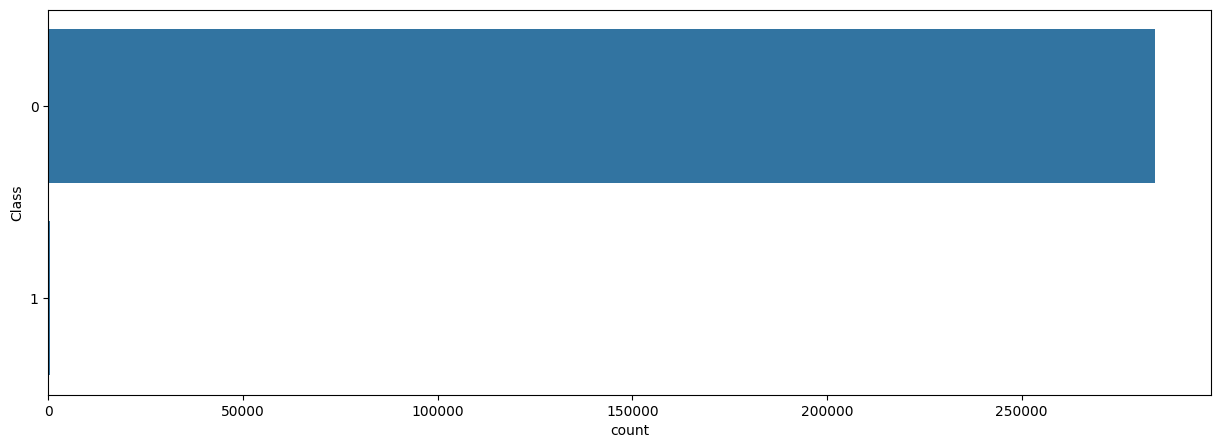

In [117]:
# plotting horizontal barplot for "Class" column with custom figsize
plt.figure(figsize=(15,5))
sns.countplot(y='Class', data=creditCard)

In [118]:
creditCard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [119]:
print(creditCard['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


## 1.4 Feature Scaling
Scale Amount and Time using standardization

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
creditCard['Amount'] = scaler.fit_transform(creditCard[['Amount']])
creditCard['Time'] = scaler.fit_transform(creditCard[['Time']])


# Train-Test Split

In [121]:
from sklearn.model_selection import train_test_split

# # Separate Features and Target
# X = creditCard.drop('Class', axis=1) # Features
# y = creditCard['Class'] # Target

# Split the data into features and target
X = creditCard.drop(columns=['Class'])  # Features
y = creditCard['Class']                 # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 1.3 Handling Class Imbalance with SMOTE

Since fraud detection is highly imbalanced, apply SMOTE to balance the training data.

In [122]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original Dataset Shape:", y.value_counts())
print("Resampled Dataset Shape:", np.bincount(y_train_resampled))

# Check the class distribution after resampling
print("Class distribution after SMOTE:\n", np.bincount(y_train_resampled))


Original Dataset Shape: Class
0    284315
1       492
Name: count, dtype: int64
Resampled Dataset Shape: [199020 199020]
Class distribution after SMOTE:
 [199020 199020]


# Modeling
Classification algorithms used:

- Logistic Regression
- KNN
- Naives Bayes
- Decision Tree
- Random Forest
- Gradient Boosting (XGBoost)

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import joblib


## 1.1 Logistic Regression

## 1.2 Random Forest

Define Parameter Grid for Randomized Search

In [124]:
param_dist = {
    'n_estimators': [10, 20, 30, 40, 100],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False]
}


Perform Randomized Search

In [126]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=5,  # Number of random combinations to try
    scoring='roc_auc',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Best model and parameters
best_model = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters:
 {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_depth': None, 'bootstrap': True}


Predictions and Metrics

In [127]:
# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 1.00
Precision: 0.77
Recall: 0.82
F1 Score: 0.79
ROC AUC Score: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.82      0.79       148

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
 [[85258    37]
 [   27   121]]


Confusion Matrix Plot

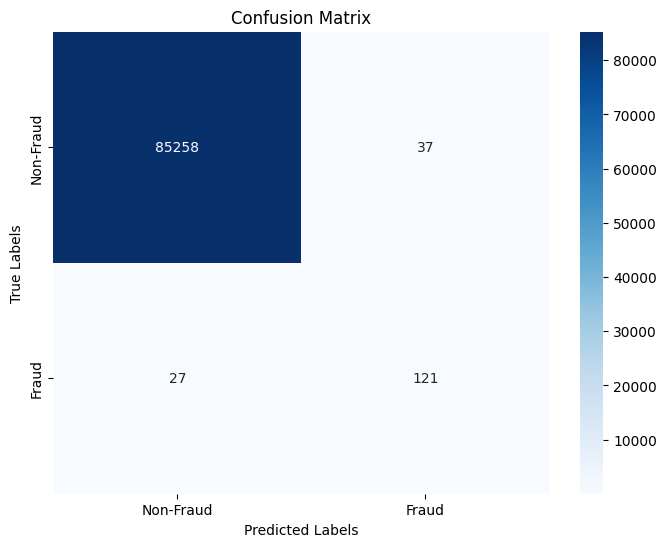

In [128]:
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Class names
class_names = ['Non-Fraud', 'Fraud']

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, class_names)


Plot AUC-ROC Curve

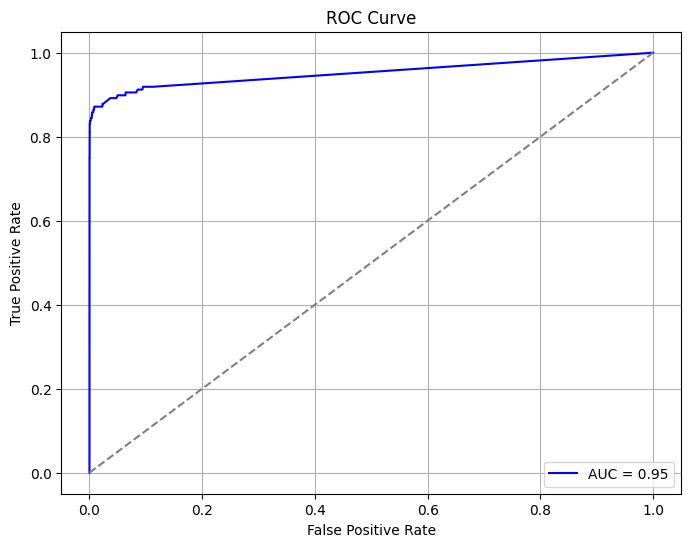

In [129]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Save the tuned Model

In [130]:
joblib.dump(best_model, 'fraud_detection_rf_model.pkl')
print("Model saved as 'fraud_detection_rf_model.pkl'")

Model saved as 'fraud_detection_rf_model.pkl'
